# Probability Distributions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

## Question 1:
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

Text(0, 0.5, '$P(X = x)$')

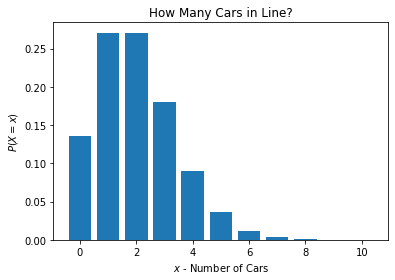

In [6]:
x = np.arange(0, 11)
y = stats.poisson(2).pmf(x)

plt.bar(x, y)
plt.title('How Many Cars in Line?')
plt.xlabel('$x$ - Number of Cars')
plt.ylabel('$P(X = x)$')

#### 1A. What is the probability that no cars drive up in the noon hour?
Simulation Solution

In [41]:
cars = np.random.poisson(2,1000000)
cars

array([1, 2, 2, ..., 1, 4, 3])

In [42]:
(cars == 0).mean()

0.135386

Theoretical Solution

In [11]:
stats.poisson(2).pmf(0)

0.1353352832366127

#### 1B. What is the probability that 3 or more cars come through the drive through?
Simulation Solution

In [43]:
(cars >= 3).mean()

0.322812

Theoretical Solution

In [12]:
stats.poisson(2).sf(2)

0.32332358381693654

#### 1C. How likely is it that the drive through gets at least 1 car?
Simulation Solution

In [44]:
(cars >= 1).mean()

0.864614

Theoretical Solution

In [14]:
stats.poisson(2).sf(0)

0.8646647167633873

## Question 2:
Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

#### 2A. What grade point average is required to be in the top 5% of the graduating class?
Simulation Solution

In [33]:
# Generates an array of 10,000 values based on a normal distribution around a mean of 3 and a std dev of 0.3
grades = np.random.normal(3,.3, 100000)

In [34]:
# Calculates the 95th percentile of the generated values
pd.Series(grades).quantile(.95)

3.4938568792142792

Theoretical Solution

In [24]:
# The simulation solution matches the theoretical solution
stats.norm(3,.3).ppf(.95)

3.4934560880854417

#### 2B. What GPA constitutes the bottom 15% of the class?
Simulation Solution

In [45]:
pd.Series(grades).quantile(.15)

2.6898319527743775

Theoretical Solution

In [18]:
stats.norm(3,.3).ppf(.15)

2.689069983151863

#### 2C. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
Simulation Solution

In [57]:
lowlimit = pd.Series(grades).quantile(.20)
lowlimit

2.748286375480312

In [58]:
highlimit = pd.Series(grades).quantile(.30)
highlimit

2.843666649029271

In [60]:
print(f"The range of grades in the third decile is from {round(lowlimit, 3)} to {round(highlimit,3)}. A student with a 2.8 GPA would qualify.")

The range of grades in the third decile is from 2.748 to 2.844. A student with a 2.8 GPA would qualify.


Theoretical Solution

In [61]:
stats.norm(3,.3).ppf(.20)

2.7475136299281258

In [62]:
stats.norm(3,.3).ppf(.30)

2.842679846187588

#### 2D. If I have a GPA of 3.5, what percentile am I in?
Simulation Solution

In [68]:
1 - (grades >= 3.5).mean()

0.95218

Theoretical Solution

In [64]:
stats.norm(3,.3).cdf(3.5)

0.9522096477271853

## Question Three
#### A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?
Simulation Solution

In [78]:
website_trials = (np.random.choice([1, 0], p=[.02, .98], size=(100000, 4326)))
website_trials

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [79]:
click_throughs = website_trials.sum(axis=1)
click_throughs

array([ 73,  85,  87, ..., 100,  83,  77])

In [80]:
click_throughs >= 97

array([False, False, False, ...,  True, False, False])

In [81]:
(click_throughs >= 97).mean()

0.13961

Theoretical Solution

In [70]:
p_click = 0.02
visitors = 4326
stats.binom(visitors, p_click).sf(96)

0.1397582363130086

## Question Four
You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
#### What is the probability that at least one of your first 60 answers is correct?
Simulation Solution

In [131]:
# This creates an array simulating answers to the first 60 questions 10,000 times
guesses = np.random.uniform(size=(10000,60)).round(2)
guesses

array([[0.27, 0.07, 0.96, ..., 0.6 , 0.2 , 0.96],
       [0.09, 0.51, 0.63, ..., 0.17, 0.4 , 0.22],
       [0.16, 0.28, 0.57, ..., 0.92, 0.65, 0.28],
       ...,
       [0.84, 0.38, 0.1 , ..., 0.99, 0.81, 1.  ],
       [0.18, 0.99, 0.93, ..., 0.43, 0.3 , 0.62],
       [0.01, 0.99, 0.39, ..., 0.66, 0.43, 0.41]])

In [136]:
# This checks each answer in the array to see if its "correct". 
# The probability of being correct would be only one value in the range of all possible answers (0 - 1)
# We can pick any value to be the "correct" value. We will pick the value of 0.27. 
guesses[0]

array([0.27, 0.07, 0.96, 0.74, 0.75, 0.35, 0.9 , 0.55, 0.34, 0.16, 0.45,
       0.88, 0.18, 0.81, 0.21, 0.45, 0.07, 0.4 , 0.9 , 0.96, 0.1 , 0.98,
       0.65, 0.92, 0.34, 0.18, 0.03, 0.9 , 0.82, 0.6 , 0.88, 0.31, 0.54,
       0.36, 0.98, 0.05, 0.97, 0.16, 0.05, 0.22, 0.99, 0.27, 0.15, 0.74,
       0.07, 0.82, 0.48, 0.12, 0.37, 0.03, 0.45, 0.65, 0.56, 0.65, 0.38,
       0.21, 0.56, 0.6 , 0.2 , 0.96])

In [135]:
# By applying .sum(axis=1) we can count the number of "correct" answers in each trial
(guesses == 0.27).sum(axis=1)

array([2, 2, 0, ..., 1, 0, 1])

In [137]:
# Then we can create a boolean array that is True when there is at least one correct answer
(guesses == 0.27).sum(axis=1) > 0

array([ True,  True, False, ...,  True, False,  True])

In [140]:
# Taking the mean of that boolean array gives us the probability of at least one correct answer
((guesses == 0.27).sum(axis=1) > 0).mean()

0.454

Theoretical Solution

Text(0, 0.5, '$P(X = x)$')

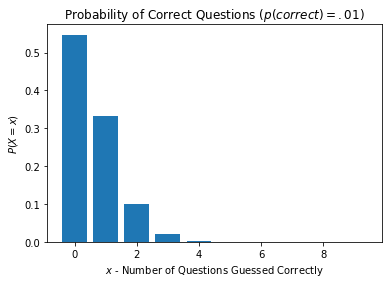

In [119]:
x = np.arange(0, 10)
y = stats.binom(60, .01).pmf(x)
plt.bar(x, y)
plt.title('Probability of Correct Questions ($p(correct) = .01$)')
plt.xlabel('$x$ - Number of Questions Guessed Correctly')
plt.ylabel('$P(X = x)$')

In [90]:
stats.binom(60, .01).sf(0)

0.4528433576092388

## Question Five
The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
#### 5A. How likely is it that the break area gets cleaned up each day? 
Simulation Solution

Theoretical Solution

#### 5B. How likely is it that it goes two days without getting cleaned up? 
Simulation Solution

Theoretical Solution

#### 5C. All week?
Simulation Solution

Theoretical Solution

## Question Six
You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. It takes 2 minutes for each person to order and 10 minutes from ordering to getting your food.

**What is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class?** Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

Simulation Solution

Theoretical Solution

## Question Seven
Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

#### 7A. What percent of employees earn less than 60,000?
Simulation Solution

Theoretical Solution

#### 7B. What percent of employees earn more than 95,000?
Simulation Solution

Theoretical Solution

#### 7C. What percent of employees earn between 65,000 and 80,000?
Simulation Solution

Theoretical Solution

#### 7D. What do the top 5% of employees make?
Simulation Solution

Theoretical Solution